## Primer: statistika temperatur v Stockholmu

Knjižnico `numpy` uporabimo na primeru podatkov dnevne temperature v Stockholmu. Podatki obsegajo meritve za vsak dan med leti 1800 in 2011. Shranjeni so v datoteki, kjer vrstice predstavljajo meritve. Posamezni podatki - leto, mesec, dan in izmerjena temperatura - so ločeni z vejico.

In [1]:
from csv import DictReader

fp = open('podatki/stockholm.csv', 'rt')
reader = DictReader(fp)

for row in reader:
    print(row)
    break  # izpisi samo prvo vrstico

OrderedDict([('Year', '1800'), ('Month', '1'), ('Day', '1'), ('Temp', '-6.1')])


Predstavitev podatkov v obliki slovarja je koristna zaradi svoje jasnosti, vendar bo računanje bistveno hitrejše,
če podatke naložimo kot polje.

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

data = np.loadtxt('podatki/stockholm.csv', delimiter=",", skiprows=1)
data

array([[ 1800. ,     1. ,     1. ,    -6.1],
       [ 1800. ,     1. ,     2. ,   -15.4],
       [ 1800. ,     1. ,     3. ,   -15. ],
       ..., 
       [ 2011. ,    12. ,    29. ,     4.9],
       [ 2011. ,    12. ,    30. ,     0.6],
       [ 2011. ,    12. ,    31. ,    -2.6]])

Preverimo velikost podatkov: število vrstic (_meritve_, _vzorci_) in število stolpcev (_atributov_).

In [3]:
data.shape

(77431, 4)

Stolpci hranijo podatke v tem vrstnem redu: `leto`, `mesec`, `dan` in `temperatura`. 

Poglejmo si vse meritve, ki so bile narejene v letu 2011. Ustvarimo binarni vektor `data[:, 0] == 2011`, ki vsebuje vrednost `True` nas ustreznih mestih ter ga uporabimo za naslavljanje podatkov.

In [4]:
data[data[:, 0] == 2011]

array([[ 2011. ,     1. ,     1. ,    -2.3],
       [ 2011. ,     1. ,     2. ,    -3.6],
       [ 2011. ,     1. ,     3. ,    -6.9],
       ..., 
       [ 2011. ,    12. ,    29. ,     4.9],
       [ 2011. ,    12. ,    30. ,     0.6],
       [ 2011. ,    12. ,    31. ,    -2.6]])

##### Vprašanje 1-2-1

Izpišite temperaturo pred 200 leti, na primer, temperaturo dne 5. decembra 1817.

[Odgovor](rešitve_01-2_podatki_temperatura.ipynb#odgovor-1-2-1)

### Procesiranje podatkov

Na tej točki nastopijo operacije, ki nam povedo nekaj o podatkih. Izračunali bomo nekaj osnovnih statistik.

#### Povprečje, aritmetična sredina

Dnevna temperatura je v stolpcu z indeksom 3 (četrti stolpec). Izračunamo povprečje vseh meritev.

In [5]:
np.mean(data[:, 3])

6.1971096847515854

Ugotovimo, da je bila povprečna dnevna temperatura v Stockholmu v preteklih 200 letih prijetnih 6.2 C. 

##### Vprašanje 1-2-2

Kakšna je povprečna temperatura januarja (mesec s številko `1`)?

[Odgovor](rešitve_01-2_podatki_temperatura.ipynb#odgovor-1-2-2)

#### Standardni odklon in varianca

In [6]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

##### Vprašanje 1-2-3

V katerem mesecu je odklon temperature največji? 

In [7]:
# Poišči mesec z največjim odklonom oz. varianco v temperaturi.
# Namig: zgradi seznam terk oblike (odklon v temperaturi, mesec)
# ...

[Odgovor](rešitve_01-2_podatki_temperatura.ipynb#odgovor-1-2-3)

#### Najmanjša in največja vrednost

Poiščimo najnižjo dnevno temperaturo:

In [8]:
data[:,3].min()

-25.800000000000001

Poiščimo najvišjo dnevno temperaturo:

In [9]:
data[:,3].max()

28.300000000000001

##### Vprašanje 1-2-4

Pošči mesec in leto, ko so zabeležili največjo temperaturo.

In [10]:
# Poišči mesec in leto, kjer smo v povprečju beležili najvišjo temperaturo.
# Namig: zgradi seznam terk oblike (povprecna temperatura, (leto, mesec))
# ...

[Odgovor](rešitve_01-2_podatki_temperatura.ipynb#odgovor-1-2-4)

#### Vsota, produkt

Temperatur ponavadi ne seštevamo. Pa vendar, izkoristimo priložnost za prikaz funkcij vsote in produkta.

In [11]:
data[:, 3].sum()  # vsota vseh temperatur

479848.40000000002

In [12]:
data[:, 3].sum() / data.shape[0]   # dobimo ravno aritmetično sredino

6.1971096847515854

In [13]:
# prva vrstica v podatkih ...
data[0, :]

array([ 1800. ,     1. ,     1. ,    -6.1])

In [14]:
# ... in njen produkt
np.prod(data[0, :])

-10980.0

### Globalno segrevanje?

Odgovorimo na še nekaj vprašanj. Po Stockholmu krožijo govorice, da se temperatura iz leta v leto povečuje.

In [15]:
# Izračunajmo povprečno temperaturo za vsako leto posebej 
letna_povprečja = dict()

for leto in range(1800, 2012):
    # Uporabimo pogojno naslavljanje polja
    letna_povprečja[leto] = data[data[:, 0] == leto, 3].mean()

##### Vprašanje 1-2-5

Izpiši leta, ko je povprečna temperatura višja od prejšnjega leta.

In [16]:
# Izpiši vsako leto, ki ima večjo povprečno temperaturo od prejšnjega
# 

Poišči 10 najtoplejših let.

In [17]:
# Poišči 10 najtoplejših let
# 

[Odgovor](rešitve_01-2_podatki_temperatura.ipynb#odgovor-1-2-5)

Zadnja leta so res sumljivo topla. Poskusimo prikazati podatke z uporabo knjižnice `matplotlib`.

In [18]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

Naredimo novo sliko (*figure*) in nanjo narišemo povprečne temperature v odvisnosti od časa. 

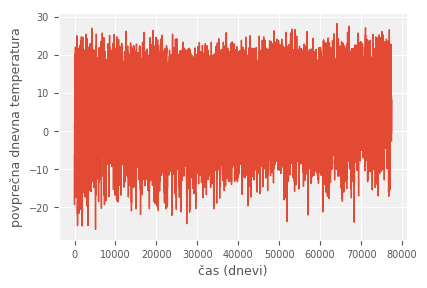

In [19]:
plt.figure()
plt.plot(data[:, 3])
plt.xlabel("čas (dnevi)")  # Vedno označimo osi.
plt.ylabel("povprečna dnevna temperatura")
plt.show()

Precej nepregledno. Poizkusite razširiti sliko tako da spremenite `plt.figure(figsize=(sirina, visina))`, kjer sta `visina` in `sirina` podani v palcih oz. inčah (privzeto `(5, 3)`) .

Vseeno pa opazimo, da se pogostost dni s temperaturo nižjo od -20.0 C zmanjšuje. Poglejmo.

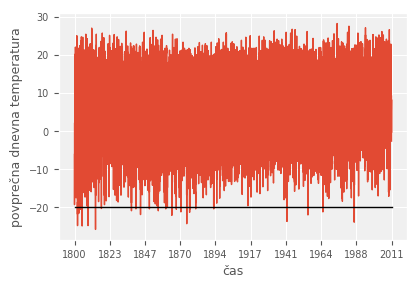

In [20]:
plt.figure()

# Narišimo izvirne podatke
plt.plot(data[:, 3])

# Z vodoravno črto označimo -20.0 C.
plt.plot([0, len(data)], [-20, -20], color="black")   

# Spremenimo še oznako x-osi. Dodajmo 10 enako oddaljenih kazalcev.
ticks = np.arange(0, len(data), len(data)//9, dtype=int)
plt.xticks(ticks)
plt.gca().set_xticklabels(data[ticks, 0].astype(int))

# Vedno označimo osi.
plt.xlabel("čas")  
plt.ylabel("povprečna dnevna temperatura")
plt.show()

Od 80-tih let prejšnjega stoletja res nismo imeli kakšnega posebej hladnega dneva. Vseeno pa bi želeli še bolj poenostaviti prikaz. Prikažimo vsako leto z eno točko, ki naj prikazuje povprečno temperaturo leta.

##### Vprašanje 1-2-6

Nariši sliko povprečne letne temperature. Uporabi funkcijo `plt.plot(x, y)`  kjer je `x` vektor let, `y` pa vektor pripadajočih povprečnih temperatur. Ali misliš, da se temperatura z leti res povečuje?

In [21]:
# Pomagaj si s letna_povprečja.
# Os x: leto
# Os y: povprečna letna temperatura
# ...

[Odgovor](rešitve_01-2_podatki_temperatura.ipynb#odgovor-1-2-6)